In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"C:\Users\welcome\Downloads\CarData.csv")

In [3]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [4]:
df.dropna()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
10,10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
15,15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00
20,20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,5999,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57 kmpl,1193 CC,88.7 bhp,5.0,7.77 Lakh,4.00
6002,6002,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09 kmpl,1598 CC,103.5 bhp,5.0,11.91 Lakh,3.25
6005,6005,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,9.93 Lakh,7.43
6010,6010,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5 kmpl,1198 CC,86.8 bhp,5.0,6.63 Lakh,3.20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [6]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2601.948435,2013.365366,5.869906e+04,5.279722,9.479468
std,1826.365869,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,906.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,2392.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,4205.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
df.corr()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
Unnamed: 0,1.000000,0.000366,-0.007550,-0.011027,-0.020275
Year,0.000366,1.000000,-0.187859,0.008216,0.305327
Kilometers_Driven,-0.007550,-0.187859,1.000000,0.090221,-0.011493
Seats,-0.011027,0.008216,0.090221,1.000000,0.052225
Price,-0.020275,0.305327,-0.011493,0.052225,1.000000


In [8]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [9]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [10]:
df.dropna

<bound method DataFrame.dropna of       Unnamed: 0                                               Name  \
0              0                             Maruti Wagon R LXI CNG   
1              1                   Hyundai Creta 1.6 CRDi SX Option   
2              2                                       Honda Jazz V   
3              3                                  Maruti Ertiga VDI   
4              4                    Audi A4 New 2.0 TDI Multitronic   
...          ...                                                ...   
7248        1229                  Volkswagen Vento Diesel Trendline   
7249        1230                             Volkswagen Polo GT TSI   
7250        1231                             Nissan Micra Diesel XV   
7251        1232                             Volkswagen Polo GT TSI   
7252        1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...   

        Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0         Mumbai  2010            

In [11]:
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [12]:
df= pd.get_dummies(df, columns= ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage'])

In [13]:
df

,Unnamed: 0,Year,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Name_Ambassador Classic Nova Diesel,Name_Audi A3 35 TDI Attraction,...,Mileage_9.0 kmpl,Mileage_9.1 kmpl,Mileage_9.3 kmpl,Mileage_9.43 kmpl,Mileage_9.5 kmpl,Mileage_9.52 kmpl,Mileage_9.7 kmpl,Mileage_9.74 kmpl,Mileage_9.8 kmpl,Mileage_9.9 kmpl
0,0,2010,72000,998 CC,58.16 bhp,5.0,NaN,1.75,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2015,41000,1582 CC,126.2 bhp,5.0,NaN,12.50,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2011,46000,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2012,87000,1248 CC,88.76 bhp,7.0,NaN,6.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2013,40670,1968 CC,140.8 bhp,5.0,NaN,17.74,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,1229,2011,89411,1598 CC,103.6 bhp,5.0,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
7249,1230,2015,59000,1197 CC,103.6 bhp,5.0,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
7250,1231,2012,28000,1461 CC,63.1 bhp,5.0,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
7251,1232,2013,52262,1197 CC,103.6 bhp,5.0,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.fillna(0)

,Unnamed: 0,Year,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Name_Ambassador Classic Nova Diesel,Name_Audi A3 35 TDI Attraction,...,Mileage_9.0 kmpl,Mileage_9.1 kmpl,Mileage_9.3 kmpl,Mileage_9.43 kmpl,Mileage_9.5 kmpl,Mileage_9.52 kmpl,Mileage_9.7 kmpl,Mileage_9.74 kmpl,Mileage_9.8 kmpl,Mileage_9.9 kmpl
0,0,2010,72000,998 CC,58.16 bhp,5.0,0,1.75,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2015,41000,1582 CC,126.2 bhp,5.0,0,12.50,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2011,46000,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2012,87000,1248 CC,88.76 bhp,7.0,0,6.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2013,40670,1968 CC,140.8 bhp,5.0,0,17.74,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,1229,2011,89411,1598 CC,103.6 bhp,5.0,0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
7249,1230,2015,59000,1197 CC,103.6 bhp,5.0,0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
7250,1231,2012,28000,1461 CC,63.1 bhp,5.0,0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
7251,1232,2013,52262,1197 CC,103.6 bhp,5.0,0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0


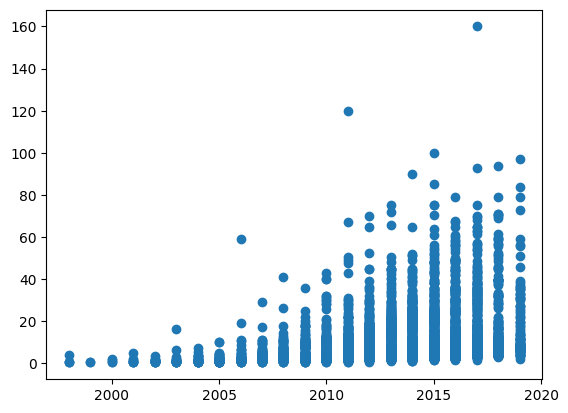

In [15]:
Year= df['Year'].values.reshape(-1,1)
Price= df['Price'].values.reshape(-1,1)
plt.scatter(Year, Price)

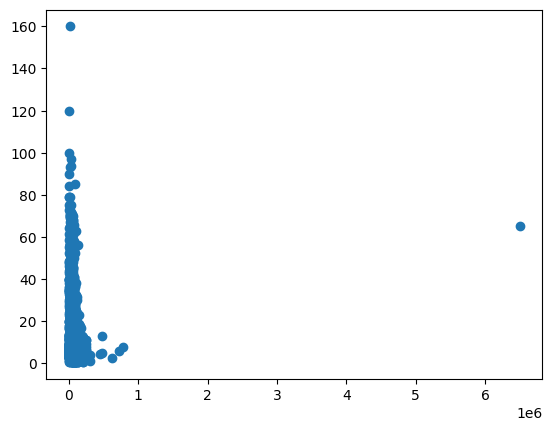

In [16]:
Kilometers_Driven= df['Kilometers_Driven'].values.reshape(-1,1)
Price= df['Price'].values.reshape(-1,1)
plt.scatter(Kilometers_Driven, Price)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

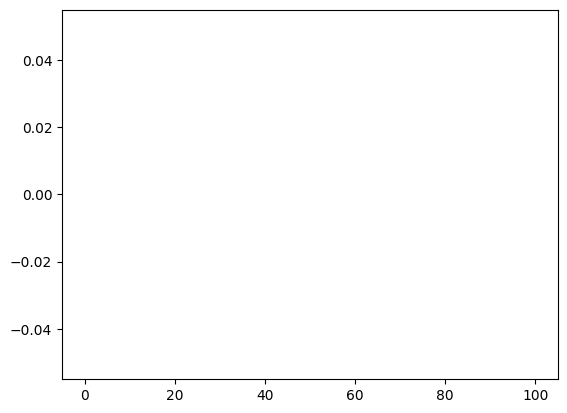

In [17]:
Year= df['Year'].values.reshape(-1,1)
bins= [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(Year, bins)

In [18]:
x= df['Year'].values.reshape(-1,1)
y= df['Price'].values.reshape(-1,1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [20]:
x_train

array([[2014],
       [2018],
       [2009],
       ...,
       [2013],
       [2014],
       [2011]], dtype=int64)

In [21]:
y_train

array([[ 3.45],
       [18.39],
       [11.  ],
       ...,
       [ 9.  ],
       [ 4.95],
       [ 5.5 ]])

In [22]:
regression = LinearRegression()

In [24]:
regression.fit(x_test, y_test)

ValueError: Input y contains NaN.

In [ ]:
regression,intercept_

In [ ]:
regression.coef_

In [ ]:
prediction= regression.predict(x_test)

In [ ]:
mse= mean_square_error(y_test, prediction)

In [ ]:
mse

In [ ]:
rmse= np.sqrt(mse)

In [ ]:
rmse